In [24]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [15]:
df=pd.read_excel("Sales Dataset.xlsx")# To read the Excel sheet

In [25]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

Dataset shape: (64104, 12)
Columns: ['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost']

First few rows:
    OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155            

In [26]:
conn = sqlite3.connect('Sales Data.db')
cursor = conn.cursor()

In [27]:
df.to_sql('sales', conn, if_exists='replace', index=False)
print("\nData loaded into SQLite table 'sales'.")



Data loaded into SQLite table 'sales'.


In [28]:
# Basic Info - Total number of orders (unique OrderNumber)
cursor.execute('''
SELECT COUNT(DISTINCT OrderNumber) AS total_orders
FROM sales
''')
total_orders = cursor.fetchone()[0]
print(f"\n1. Total Number of Orders: {total_orders}")


1. Total Number of Orders: 10684


In [29]:
#Total Quantity Sold (sum of Order Quantity)
cursor.execute('''
SELECT SUM("Order Quantity") AS total_quantity_sold
FROM sales
''')
total_quantity = cursor.fetchone()[0]
print(f"2. Total Quantity Sold: {total_quantity}")

2. Total Quantity Sold: 541146


In [30]:
# Total Revenue (sum of Line Total, assuming this is revenue per line)
cursor.execute('''
SELECT SUM("Line Total") AS total_revenue
FROM sales
''')
total_revenue = cursor.fetchone()[0]
print(f"3. Total Revenue: ${total_revenue:.2f}")

3. Total Revenue: $1235968899.00


In [31]:
# Average Unit Price
cursor.execute('''
SELECT AVG("Unit Price") AS avg_unit_price
FROM sales
''')
avg_unit_price = cursor.fetchone()[0]
print(f"4. Average Unit Price: ${avg_unit_price:.2f}")

4. Average Unit Price: $2284.38


In [32]:
# Total Cost (sum of Total Unit Cost)
cursor.execute('''
SELECT SUM("Total Unit Cost") AS total_cost
FROM sales
''')
total_cost = cursor.fetchone()[0]
print(f"5. Total Cost: ${total_cost:.2f}")

5. Total Cost: $91802306.29


In [33]:
 #Profit (Total Revenue - Total Cost)
profit = total_revenue - total_cost
print(f"6. Total Profit: ${profit:.2f}")

6. Total Profit: $1144166592.71


In [34]:
#Top 5 Products by Quantity Sold (group by Product Description Index)
cursor.execute('''
SELECT "Product Description Index", SUM("Order Quantity") AS total_qty
FROM sales
GROUP BY "Product Description Index"
ORDER BY total_qty DESC
LIMIT 5
''')
top_products = cursor.fetchall()
print(f"\n7. Top 5 Products by Quantity Sold:")
for product, qty in top_products:
    print(f"   - {product}: {qty}")


7. Top 5 Products by Quantity Sold:
   - 26: 50364
   - 25: 50358
   - 13: 34014
   - 14: 32484
   - 15: 31242


In [35]:
#Sales by Delivery Region (total revenue grouped by region)
cursor.execute('''
SELECT "Delivery Region Index", SUM("Line Total") AS region_revenue
FROM sales
GROUP BY "Delivery Region Index"
ORDER BY region_revenue DESC
''')
sales_by_region = cursor.fetchall()
print(f"\n8. Total Revenue by Delivery Region:")
for region, revenue in sales_by_region:
    print(f"   - {region}: ${revenue:.2f}")


8. Total Revenue by Delivery Region:
   - 388: $2464400.70
   - 125: $2376697.70
   - 357: $2274428.90
   - 770: $2238764.80
   - 533: $2231850.40
   - 334: $2177366.00
   - 623: $2152234.30
   - 237: $2149406.90
   - 400: $2104878.70
   - 819: $2100697.90
   - 231: $2093033.10
   - 198: $2082018.30
   - 256: $2038830.10
   - 450: $2034548.80
   - 558: $1972975.80
   - 895: $1971689.40
   - 985: $1970878.70
   - 247: $1970483.40
   - 455: $1964795.10
   - 325: $1956996.30
   - 930: $1936983.40
   - 980: $1925888.20
   - 712: $1922993.80
   - 803: $1916622.10
   - 431: $1900233.90
   - 917: $1880830.70
   - 504: $1863337.00
   - 946: $1852047.50
   - 653: $1851404.30
   - 70: $1843531.80
   - 886: $1839746.30
   - 562: $1838118.20
   - 173: $1832088.20
   - 233: $1824657.90
   - 364: $1823398.30
   - 55: $1819559.20
   - 563: $1816959.60
   - 842: $1815063.50
   - 961: $1813087.00
   - 496: $1811653.20
   - 225: $1809100.50
   - 110: $1807566.20
   - 735: $1799573.10
   - 591: $1796544

In [36]:
#Sales by Channel (total revenue grouped by Channel)
cursor.execute('''
SELECT Channel, SUM("Line Total") AS channel_revenue
FROM sales
GROUP BY Channel
ORDER BY channel_revenue DESC
''')
sales_by_channel = cursor.fetchall()
print(f"\n9. Total Revenue by Channel:")
for channel, revenue in sales_by_channel:
    print(f"   - {channel}: ${revenue:.2f}")



9. Total Revenue by Channel:
   - Wholesale: $668197244.40
   - Distributor: $387139788.60
   - Export: $180631866.00


In [37]:
#Top 5 Customers by Revenue (group by Customer Name Index)
cursor.execute('''
SELECT "Customer Name Index", SUM("Line Total") AS customer_revenue
FROM sales
GROUP BY "Customer Name Index"
ORDER BY customer_revenue DESC
LIMIT 5
''')
top_customers = cursor.fetchall()
print(f"\n10. Top 5 Customers by Revenue:")
for customer, revenue in top_customers:
    print(f"    - {customer}: ${revenue:.2f}")


10. Top 5 Customers by Revenue:
    - 100: $12641251.80
    - 45: $12220639.20
    - 41: $10986459.00
    - 106: $10955826.60
    - 80: $10753299.00


In [38]:
#Total Revenue for a Specific Date Range (e.g., 2023 orders)
# Assuming OrderDate is in 'YYYY-MM-DD' format; adjust if needed
cursor.execute('''
SELECT SUM("Line Total") AS revenue_2023
FROM sales
WHERE strftime('%Y', OrderDate) = '2023'
''')
revenue_2023 = cursor.fetchone()[0] or 0
print(f"\n11. Total Revenue for 2023: ${revenue_2023:.2f}")


11. Total Revenue for 2023: $0.00


In [39]:
#Average Order Value (total revenue / total orders)
cursor.execute('''
SELECT (SUM("Line Total") / COUNT(DISTINCT OrderNumber)) AS avg_order_value
FROM sales
''')
avg_order_value = cursor.fetchone()[0]
print(f"12. Average Order Value: ${avg_order_value:.2f}")

12. Average Order Value: $115684.10


In [40]:
#Count of Unique Products
cursor.execute('''
SELECT COUNT(DISTINCT "Product Description Index") AS unique_products
FROM sales
''')
unique_products = cursor.fetchone()[0]
print(f"13. Number of Unique Products: {unique_products}")

13. Number of Unique Products: 30


In [42]:
#Currency Distribution (if multiple currencies)
cursor.execute('''
SELECT "Currency Code", COUNT(*) AS order_count
FROM sales
GROUP BY "Currency Code"
''')
currencies = cursor.fetchall()
print(f"\n14. Order Count by Currency:")
for currency, count in currencies:
    print(f"   - {currency}: {count} orders")


14. Order Count by Currency:
   - USD: 64104 orders


In [45]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')


In [46]:
# Extract year and month for time-based plots
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month


In [48]:
# Handle any missing values (drop rows with NaN in key columns for simplicity)
df = df.dropna(subset=['Order Quantity', 'Line Total', 'Unit Price'])
# Set style for Seaborn (optional, for better aesthetics)
sns.set_style("whitegrid")
plt.style.use('default')  # For Matplotlib


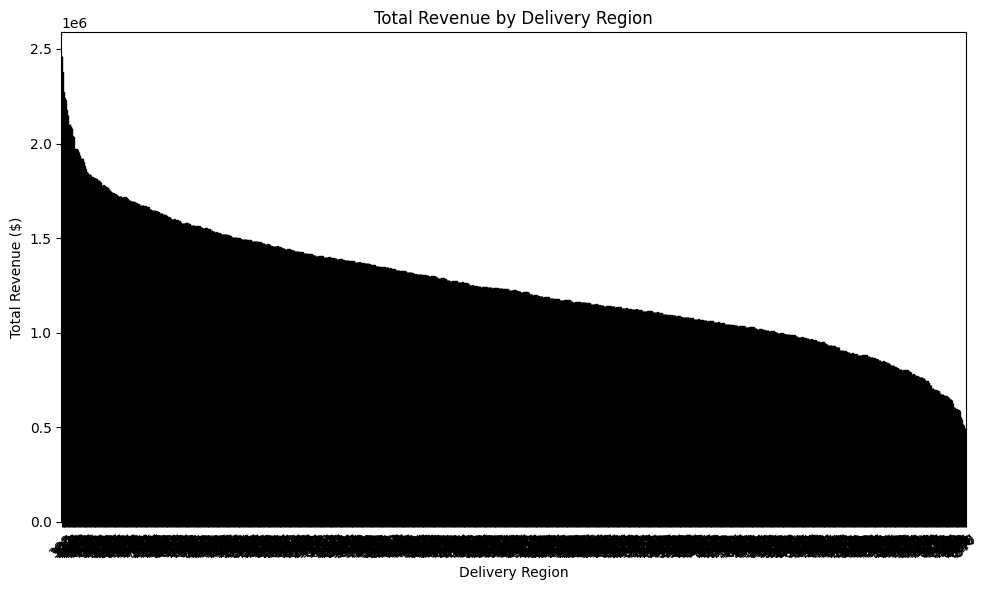

In [50]:
#Total Revenue by Delivery Region (using Matplotlib)
region_revenue = df.groupby('Delivery Region Index')['Line Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Revenue by Delivery Region')
plt.xlabel('Delivery Region')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

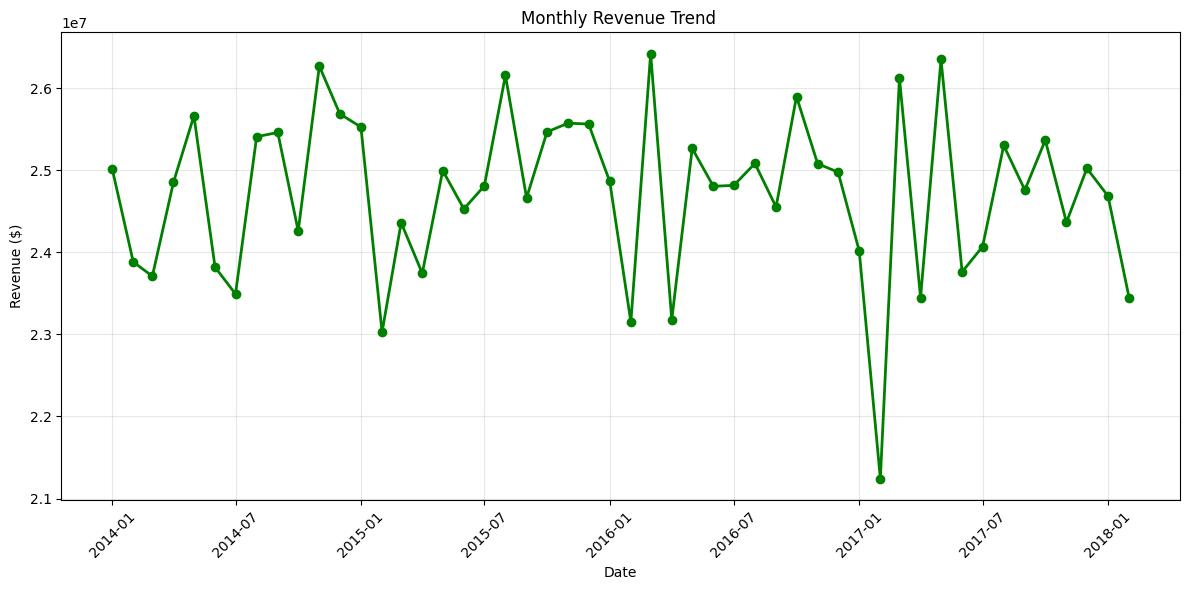

In [51]:
#Sales Trend Over Time (Monthly Revenue)
monthly_revenue = df.groupby(['Year', 'Month'])['Line Total'].sum().reset_index()
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(day=1))
monthly_revenue = monthly_revenue.sort_values('Date')
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Date'], monthly_revenue['Line Total'], marker='o', linewidth=2, color='green')
plt.title('Monthly Revenue Trend ')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

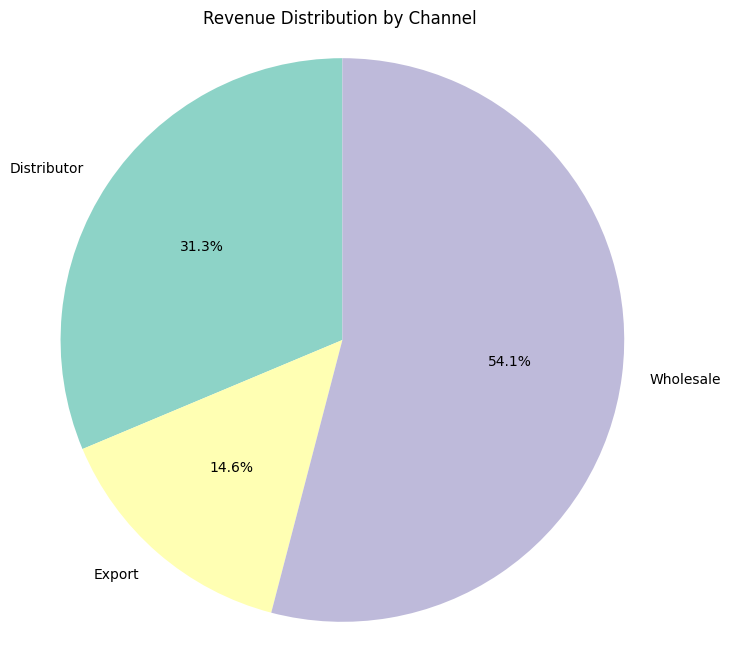

In [52]:
#Revenue Distribution by Channel
channel_revenue = df.groupby('Channel')['Line Total'].sum()
plt.figure(figsize=(8, 8))
plt.pie(channel_revenue.values, labels=channel_revenue.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Revenue Distribution by Channel ')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

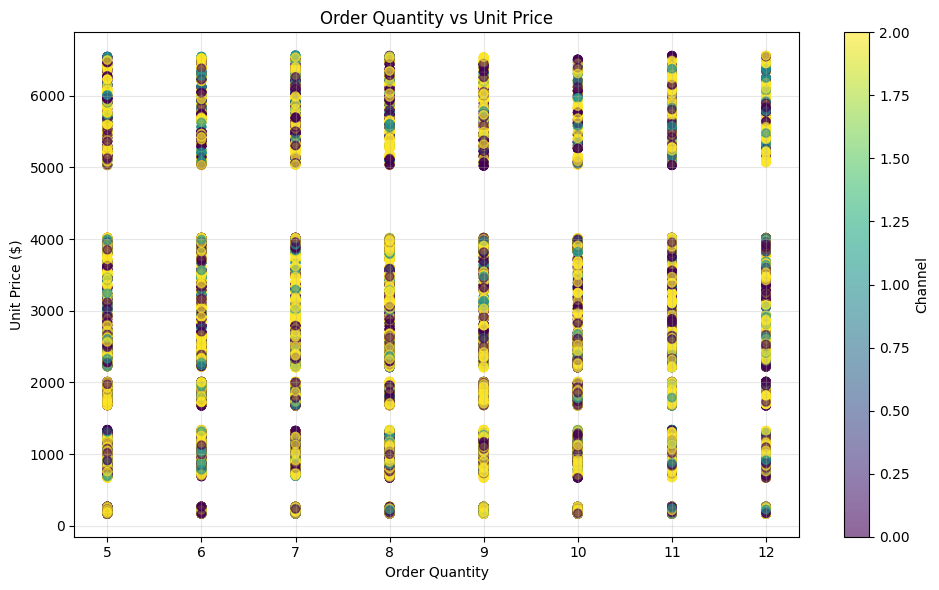

In [53]:
 #Order Quantity vs Unit Price (colored by Channel)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Order Quantity'], df['Unit Price'], c=df['Channel'].astype('category').cat.codes, cmap='viridis', alpha=0.6)
plt.title('Order Quantity vs Unit Price')
plt.xlabel('Order Quantity')
plt.ylabel('Unit Price ($)')
plt.colorbar(scatter, label='Channel')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

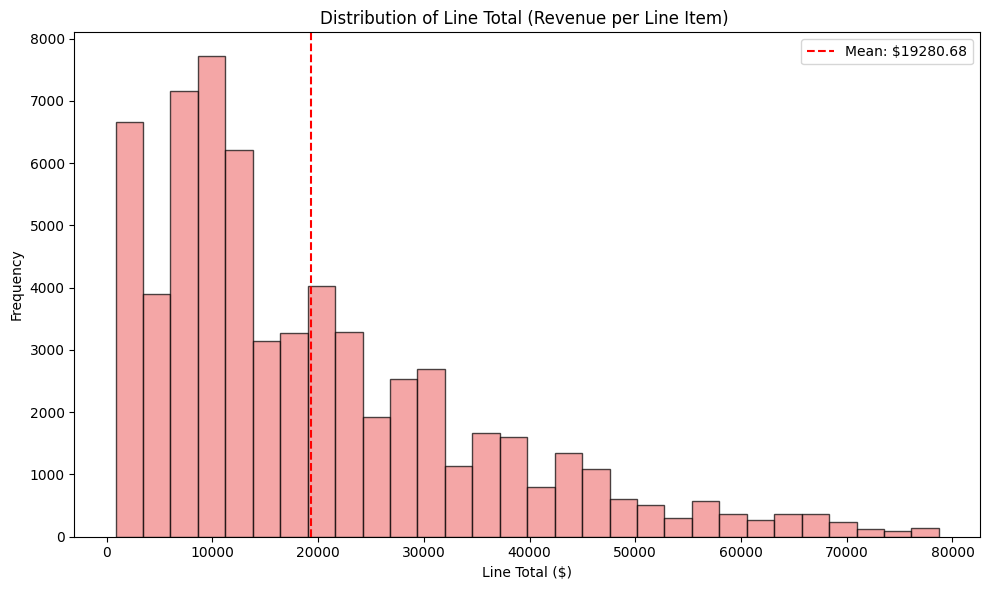

In [55]:
#Distribution of Line Total
plt.figure(figsize=(10, 6))
plt.hist(df['Line Total'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Line Total (Revenue per Line Item) ')
plt.xlabel('Line Total ($)')
plt.ylabel('Frequency')
plt.axvline(df['Line Total'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Line Total"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-2233932246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Channel', palette='Set2')


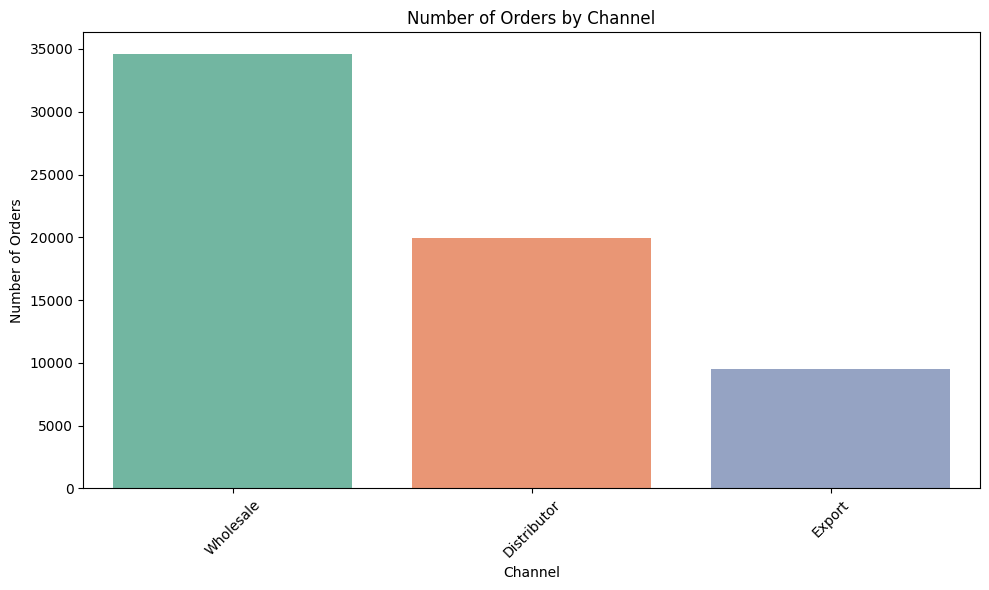

In [56]:
# Number of Orders by Channel
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Channel', palette='Set2')
plt.title('Number of Orders by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()